# Parallel Trends Analysis: Florida and Washington

This notebook analyzes opioid-related mortality and opioid distribution trends in Florida and Washington compared to control states, before and after major policy interventions. It includes data loading, trend visualization, and statistical tests for parallel trends assumptions.

In [1]:
# Imports and display settings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

pd.set_option("mode.copy_on_write", True)

In [2]:
# Load the final merged dataset (150K threshold, end-use buyers)
final_merged = pd.read_csv("../01_data/clean/final_merged_150k.csv")
print(f"Loaded {len(final_merged)} observations")

Loaded 566 observations


## Data Loading

Load the cleaned and merged dataset containing county-level opioid mortality and distribution data for all states.

In [3]:
# Florida Parallel Trends Analysis
states_fl = [
    "Florida",
    "North Carolina",
    "South Carolina",
    "Georgia",
    "Tennessee",
    "Mississippi",
]

## Florida Analysis

### Setup
Define treatment and control states for the Florida policy analysis.

In [4]:
# Mortality Trends: Florida vs Control States
df_fl_mortality = final_merged[
    (final_merged["STNAME"].isin(states_fl))
    & (final_merged["Year"] >= 2007)
    & (final_merged["Year"] <= 2010)
][["STNAME", "CTYNAME", "Year", "population", "Deaths"]].copy()

df_fl_mortality["mortality_rate"] = (
    df_fl_mortality["Deaths"] / df_fl_mortality["population"] * 100000
)

fl_mort_trend = (
    df_fl_mortality.groupby(["STNAME", "Year"])["mortality_rate"].mean().reset_index()
)

print(f"Florida mortality panel: {len(df_fl_mortality)} observations")
print(f"States: {df_fl_mortality['STNAME'].unique()}")

Florida mortality panel: 126 observations
States: ['Florida' 'Georgia' 'Mississippi' 'North Carolina' 'South Carolina'
 'Tennessee']


### Mortality Trends: Florida vs Control States

Calculate and plot average drug-related mortality rates for Florida and control states during the pre-policy period.

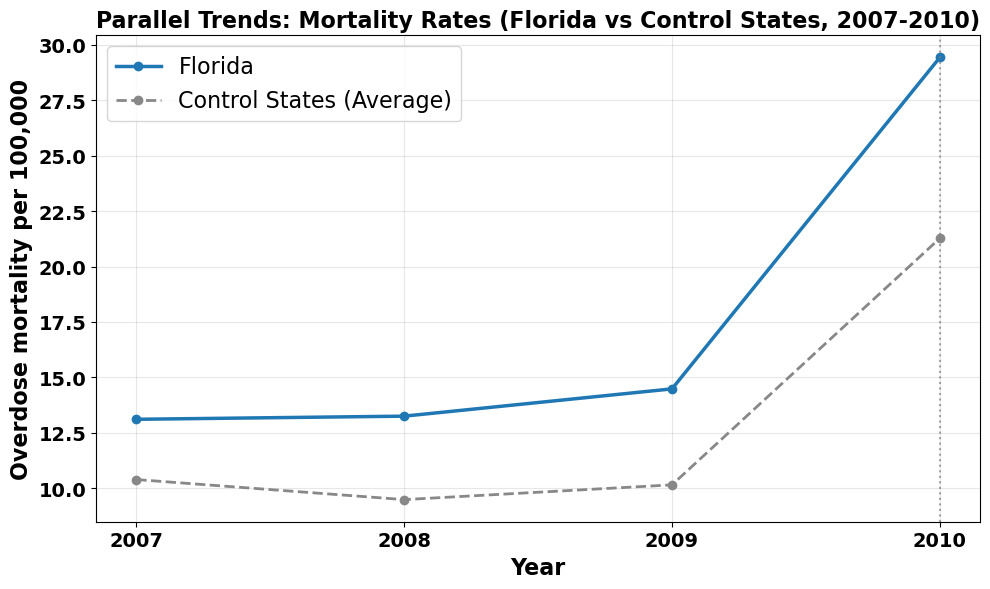

In [5]:
# Plot Florida mortality parallel trends
fig, ax = plt.subplots(figsize=(10, 6))
colors = {
    "Florida": "#1f77b4",
    "Control States (Average)": "#888888",
}
fl_data = fl_mort_trend[fl_mort_trend["STNAME"] == "Florida"]
ax.plot(
    fl_data["Year"],
    fl_data["mortality_rate"],
    marker="o",
    linestyle="-",
    linewidth=2.5,
    color=colors["Florida"],
    label="Florida",
)
control_data = fl_mort_trend[fl_mort_trend["STNAME"] != "Florida"]
control_avg = control_data.groupby("Year")["mortality_rate"].mean().reset_index()
ax.plot(
    control_avg["Year"],
    control_avg["mortality_rate"],
    marker="o",
    linestyle="--",
    linewidth=2,
    color=colors["Control States (Average)"],
    label="Control States (Average)",
)
ax.axvline(2010, color="gray", linestyle=":", linewidth=1.5, alpha=0.7)
ax.set_xlabel("Year", fontsize=16, fontweight="bold")
ax.set_ylabel("Overdose mortality per 100,000", fontsize=16, fontweight="bold")
ax.set_title(
    "Parallel Trends: Mortality Rates (Florida vs Control States, 2007-2010)",
    fontsize=16,
    fontweight="bold",
)
ax.legend(fontsize=16, loc="upper left")
ax.grid(alpha=0.3)
ax.set_xticks(sorted(fl_data["Year"].unique()))
ax.tick_params(axis="both", labelsize=14)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight("bold")
plt.tight_layout()
plt.savefig(
    "../05_outputs/figures/parallel_trends_florida_mortality.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

### Opioid Distribution Trends: Florida vs Control States

Calculate and plot average opioid distribution per capita for Florida and control states during the pre-policy period.

In [6]:
# Opioid Distribution Trends: Florida vs Control States
df_fl_opioid = final_merged[
    (final_merged["STNAME"].isin(states_fl))
    & (final_merged["Year"] >= 2007)
    & (final_merged["Year"] <= 2010)
][["STNAME", "CTYNAME", "Year", "population", "TOTAL_MME"]].copy()

df_fl_opioid["opioid_per_capita"] = (
    df_fl_opioid["TOTAL_MME"] / df_fl_opioid["population"]
)

fl_opioid_trend = (
    df_fl_opioid.groupby(["STNAME", "Year"])["opioid_per_capita"].mean().reset_index()
)

print(f"Florida opioid panel: {len(df_fl_opioid)} observations")

Florida opioid panel: 126 observations


## Washington Analysis

### Setup
Define treatment and control states for the Washington policy analysis.

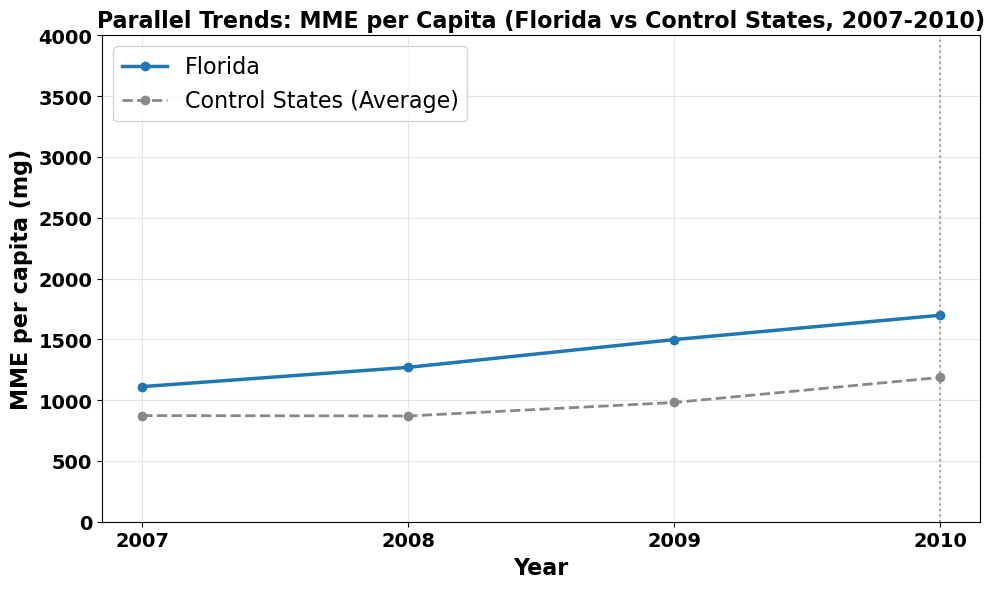

In [7]:
# Plot Florida opioid parallel trends
fig, ax = plt.subplots(figsize=(10, 6))
fl_data = fl_opioid_trend[fl_opioid_trend["STNAME"] == "Florida"]
ax.plot(
    fl_data["Year"],
    fl_data["opioid_per_capita"],
    marker="o",
    linestyle="-",
    linewidth=2.5,
    color="#1f77b4",
    label="Florida",
)
control_data = fl_opioid_trend[fl_opioid_trend["STNAME"] != "Florida"]
control_avg = control_data.groupby("Year")["opioid_per_capita"].mean().reset_index()
ax.plot(
    control_avg["Year"],
    control_avg["opioid_per_capita"],
    marker="o",
    linestyle="--",
    linewidth=2,
    color="#888888",
    label="Control States (Average)",
)
ax.axvline(2010, color="gray", linestyle=":", linewidth=1.5, alpha=0.7)
ax.set_xlabel("Year", fontsize=16, fontweight="bold")
ax.set_ylabel("MME per capita (mg)", fontsize=16, fontweight="bold")
ax.set_title(
    "Parallel Trends: MME per Capita (Florida vs Control States, 2007-2010)",
    fontsize=16,
    fontweight="bold",
)
ax.legend(fontsize=16, loc="upper left")
ax.grid(alpha=0.3)
ax.set_xticks(sorted(fl_data["Year"].unique()))
ax.set_ylim(0, 4000)
ax.tick_params(axis="both", labelsize=14)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight("bold")
plt.tight_layout()
plt.savefig(
    "../05_outputs/figures/parallel_trends_florida_opioid.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

In [8]:
# Washington Parallel Trends Analysis
states_wa = ["Washington", "Oregon", "Idaho", "Montana"]

In [9]:
# Mortality Trends: Washington vs Control States
df_wa_mortality = final_merged[
    (final_merged["STNAME"].isin(states_wa))
    & (final_merged["Year"] >= 2006)
    & (final_merged["Year"] <= 2012)
][["STNAME", "CTYNAME", "Year", "population", "Deaths"]].copy()

df_wa_mortality["mortality_rate"] = (
    df_wa_mortality["Deaths"] / df_wa_mortality["population"] * 100000
)

wa_mort_trend = (
    df_wa_mortality.groupby(["STNAME", "Year"])["mortality_rate"].mean().reset_index()
)

print(f"Washington mortality panel: {len(df_wa_mortality)} observations")
print(f"States: {df_wa_mortality['STNAME'].unique()}")

Washington mortality panel: 62 observations
States: ['Idaho' 'Oregon' 'Washington' 'Montana']


### Mortality Trends: Washington vs Control States

Calculate and plot average drug-related mortality rates for Washington and control states during the pre-policy period.

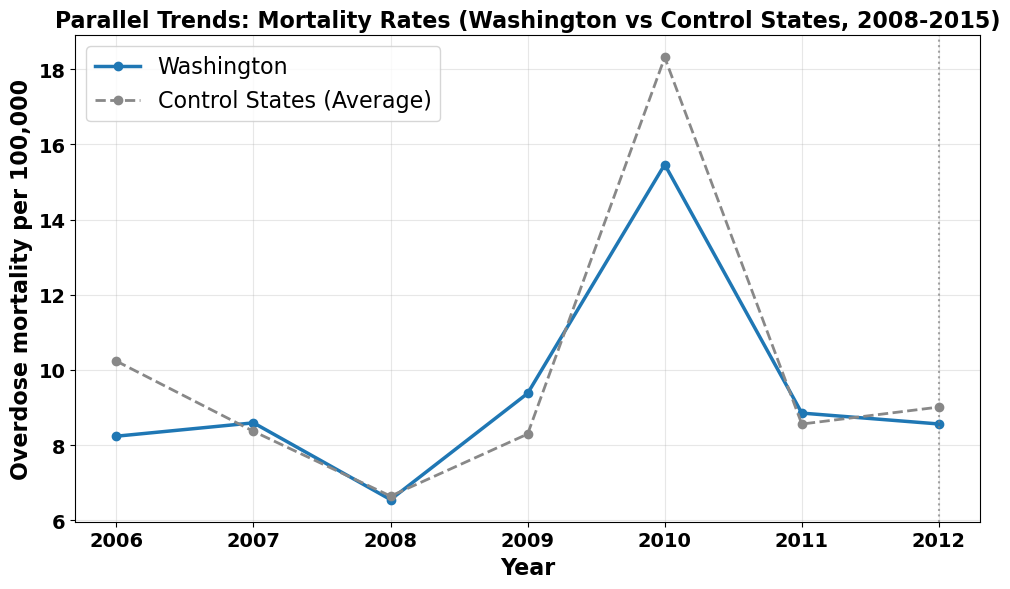

In [10]:
# Plot Washington mortality parallel trends
fig, ax = plt.subplots(figsize=(10, 6))
wa_data = wa_mort_trend[wa_mort_trend["STNAME"] == "Washington"]
ax.plot(
    wa_data["Year"],
    wa_data["mortality_rate"],
    marker="o",
    linestyle="-",
    linewidth=2.5,
    color="#1f77b4",
    label="Washington",
)
control_data = wa_mort_trend[wa_mort_trend["STNAME"] != "Washington"]
control_avg = control_data.groupby("Year")["mortality_rate"].mean().reset_index()
ax.plot(
    control_avg["Year"],
    control_avg["mortality_rate"],
    marker="o",
    linestyle="--",
    linewidth=2,
    color="#888888",
    label="Control States (Average)",
)
ax.axvline(2012, color="gray", linestyle=":", linewidth=1.5, alpha=0.7)
ax.set_xlabel("Year", fontsize=16, fontweight="bold")
ax.set_ylabel("Overdose mortality per 100,000", fontsize=16, fontweight="bold")
ax.set_title(
    "Parallel Trends: Mortality Rates (Washington vs Control States, 2008-2015)",
    fontsize=16,
    fontweight="bold",
)
ax.legend(fontsize=16, loc="upper left")
ax.grid(alpha=0.3)
ax.tick_params(axis="both", labelsize=14)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight("bold")
plt.tight_layout()
plt.savefig(
    "../05_outputs/figures/parallel_trends_washington_mortality.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

### Opioid Distribution Trends: Washington vs Control States

Calculate and plot average opioid distribution per capita for Washington and control states during the pre-policy period.

In [11]:
# Opioid Distribution Trends: Washington vs Control States
df_wa_opioid = final_merged[
    (final_merged["STNAME"].isin(states_wa))
    & (final_merged["Year"] >= 2006)
    & (final_merged["Year"] <= 2012)
][["STNAME", "CTYNAME", "Year", "population", "TOTAL_MME"]].copy()

df_wa_opioid["opioid_per_capita"] = (
    df_wa_opioid["TOTAL_MME"] / df_wa_opioid["population"]
)

wa_opioid_trend = (
    df_wa_opioid.groupby(["STNAME", "Year"])["opioid_per_capita"].mean().reset_index()
)

print(f"Washington opioid panel: {len(df_wa_opioid)} observations")

Washington opioid panel: 62 observations


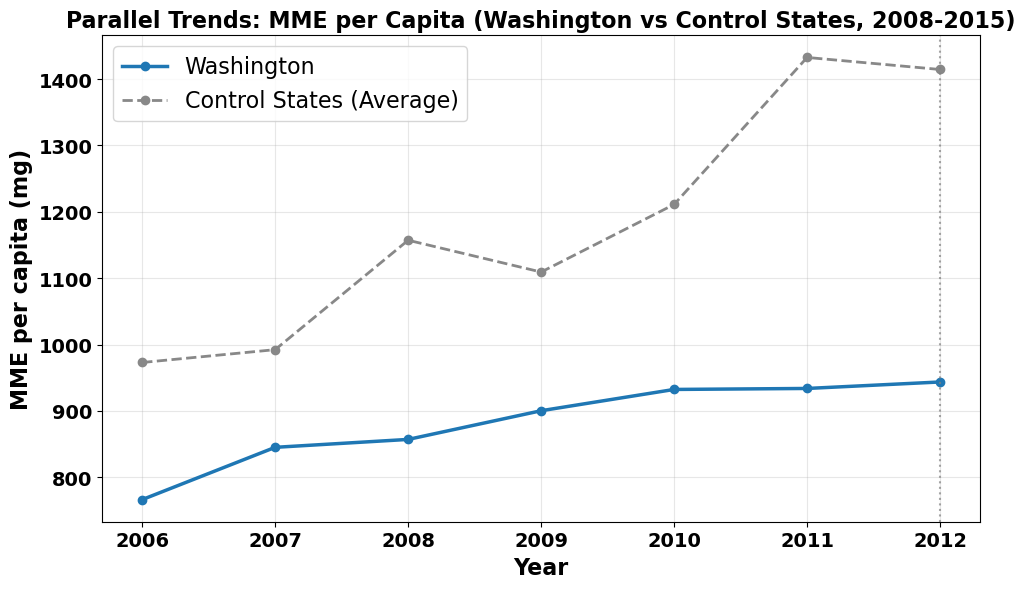

In [12]:
# Plot Washington opioid parallel trends
wa_data = wa_opioid_trend[wa_opioid_trend["STNAME"] == "Washington"]
control_data = wa_opioid_trend[wa_opioid_trend["STNAME"] != "Washington"]
control_avg = control_data.groupby("Year")["opioid_per_capita"].mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(
    wa_data["Year"],
    wa_data["opioid_per_capita"],
    marker="o",
    linestyle="-",
    linewidth=2.5,
    color="#1f77b4",
    label="Washington",
)
ax.plot(
    control_avg["Year"],
    control_avg["opioid_per_capita"],
    marker="o",
    linestyle="--",
    linewidth=2,
    color="#888888",
    label="Control States (Average)",
)
ax.axvline(2012, color="gray", linestyle=":", linewidth=1.5, alpha=0.7)
ax.set_xlabel("Year", fontsize=16, fontweight="bold")
ax.set_ylabel("MME per capita (mg)", fontsize=16, fontweight="bold")
ax.set_title(
    "Parallel Trends: MME per Capita (Washington vs Control States, 2008-2015)",
    fontsize=16,
    fontweight="bold",
)
ax.legend(fontsize=16, loc="upper left")
ax.grid(alpha=0.3)
ax.tick_params(axis="both", labelsize=14)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight("bold")
plt.tight_layout()
plt.savefig(
    "../05_outputs/figures/parallel_trends_washington_opioid.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

### Parallel Trends Regression Test: Opioid Distribution (Florida and Washington)

Run a regression to test if pre-policy opioid distribution trends in Florida and Washington and their respective control states are statistically parallel. The interaction term (`treated:Year`) should not be significant if the parallel trends assumption holds.

In [13]:
# Parallel Trends Regression Test: Opioid Distribution (Florida)
# Add a treatment indicator for Florida
df_fl_opioid["treated"] = (df_fl_opioid["STNAME"] == "Florida").astype(int)

# Run regression: opioid_per_capita ~ treated + Year + treated:Year
model_fl_opioid = smf.ols(
    formula="opioid_per_capita ~ treated + Year + treated:Year", data=df_fl_opioid
).fit()

print("Florida Opioid Distribution Parallel Trends Test")
print("=" * 60)
print(model_fl_opioid.summary())
print("\nInterpretation:")
print(
    "If the p-value for the treated:Year coefficient is NOT significant (p > 0.05), the parallel trends assumption holds."
)

Florida Opioid Distribution Parallel Trends Test
                            OLS Regression Results                            
Dep. Variable:      opioid_per_capita   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     6.131
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           0.000643
Time:                        22:35:24   Log-Likelihood:                -990.88
No. Observations:                 126   AIC:                             1990.
Df Residuals:                     122   BIC:                             2001.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

#### Parallel Trends Regression Test: Opioid Distribution (Florida)
This cell runs a regression to test whether the pre-policy opioid distribution trends in Florida and its control states are statistically parallel. The key coefficient is the interaction term (`treated:Year`). If its p-value is not significant (p > 0.05), the parallel trends assumption holds.

In [14]:
# Parallel Trends Regression Test: Opioid Distribution (Washington)
# Add a treatment indicator for Washington
df_wa_opioid["treated"] = (df_wa_opioid["STNAME"] == "Washington").astype(int)

# Run regression: opioid_per_capita ~ treated + Year + treated:Year
model_wa_opioid = smf.ols(
    formula="opioid_per_capita ~ treated + Year + treated:Year", data=df_wa_opioid
).fit()

print("Washington Opioid Distribution Parallel Trends Test")
print("=" * 60)
print(model_wa_opioid.summary())
print("\nInterpretation:")
print(
    "If the p-value for the treated:Year coefficient is NOT significant (p > 0.05), the parallel trends assumption holds."
)

Washington Opioid Distribution Parallel Trends Test
                            OLS Regression Results                            
Dep. Variable:      opioid_per_capita   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           8.94e-06
Time:                        22:35:24   Log-Likelihood:                -440.52
No. Observations:                  62   AIC:                             889.0
Df Residuals:                      58   BIC:                             897.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

#### Parallel Trends Regression Test: Opioid Distribution (Washington)
This cell runs a regression to test whether the pre-policy opioid distribution trends in Washington and its control states are statistically parallel. The key coefficient is the interaction term (`treated:Year`). If its p-value is not significant (p > 0.05), the parallel trends assumption holds.

In [15]:
# Parallel Trends Regression Test: Mortality (Florida)
# Add a treatment indicator for Florida
df_fl_mortality["treated"] = (df_fl_mortality["STNAME"] == "Florida").astype(int)

# Run regression: mortality_rate ~ treated + Year + treated:Year
model_fl_mort = smf.ols(
    formula="mortality_rate ~ treated + Year + treated:Year", data=df_fl_mortality
).fit()

print("Florida Mortality Parallel Trends Test")
print("=" * 60)
print(model_fl_mort.summary())
print("\nInterpretation:")
print(
    "If the p-value for the treated:Year coefficient is NOT significant (p > 0.05), the parallel trends assumption holds."
)

Florida Mortality Parallel Trends Test
                            OLS Regression Results                            
Dep. Variable:         mortality_rate   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     15.22
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           2.78e-08
Time:                        22:35:24   Log-Likelihood:                -375.49
No. Observations:                 108   AIC:                             759.0
Df Residuals:                     104   BIC:                             769.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept

#### Parallel Trends Regression Test: Mortality (Florida)
This cell runs a regression to test whether the pre-policy mortality trends in Florida and its control states are statistically parallel. The key coefficient is the interaction term (`treated:Year`). If its p-value is not significant (p > 0.05), the parallel trends assumption holds.

### Florida: Parallel Trends Regression Test

Run a regression to test if pre-policy mortality trends in Florida and control states are statistically parallel. The interaction term (`treated:Year`) should not be significant if the parallel trends assumption holds.

## Statistical Tests for Parallel Trends

Test whether the pre-policy trends for treatment and control states are statistically parallel using regression models with interaction terms.

In [16]:
# Parallel Trends Regression Test: Mortality (Washington)
# Add a treatment indicator for Washington
df_wa_mortality["treated"] = (df_wa_mortality["STNAME"] == "Washington").astype(int)

# Run regression: mortality_rate ~ treated + Year + treated:Year
model_wa_mort = smf.ols(
    formula="mortality_rate ~ treated + Year + treated:Year", data=df_wa_mortality
).fit()

print("Washington Mortality Parallel Trends Test")
print("=" * 60)
print(model_wa_mort.summary())
print("\nInterpretation:")
print(
    "If the p-value for the treated:Year coefficient is NOT significant (p > 0.05), the parallel trends assumption holds."
)

Washington Mortality Parallel Trends Test
                            OLS Regression Results                            
Dep. Variable:         mortality_rate   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.215
Date:                Thu, 11 Dec 2025   Prob (F-statistic):              0.313
Time:                        22:35:24   Log-Likelihood:                -161.07
No. Observations:                  59   AIC:                             330.1
Df Residuals:                      55   BIC:                             338.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Interc

#### Parallel Trends Regression Test: Mortality (Washington)
This cell runs a regression to test whether the pre-policy mortality trends in Washington and its control states are statistically parallel. The key coefficient is the interaction term (`treated:Year`). If its p-value is not significant (p > 0.05), the parallel trends assumption holds.